In [1]:
import pandas as pd

In [3]:
!ls

sample_data


In [4]:
df_xy = pd.read_csv("uk12_xy.csv", header=None, names=['x','y'])
df_xy.head()

,x,y
0,0.00019,-0.000286
1,383.45800,-0.000609
2,-27.02060,-282.758000
3,335.75100,-269.577000
4,69.43310,-246.780000


In [6]:
df_cityname = pd.read_csv("uk12_name.csv", header=None, names=['name'])
df_cityname.head()

,name
0,Aberystwyth
1,Brighton
2,Edinburgh
3,Exeter
4,Glasgow


In [7]:
df_tsp = df_cityname.join(df_xy)
df_tsp.head()

,name,x,y
0,Aberystwyth,0.00019,-0.000286
1,Brighton,383.45800,-0.000609
2,Edinburgh,-27.02060,-282.758000
3,Exeter,335.75100,-269.577000
4,Glasgow,69.43310,-246.780000


In [8]:
# from collections import namedtuple
# Capital = namedtuple('Capital', 'name state x y')
tsp = df_tsp.apply(lambda row: (row.name, row.x, row.y), axis=1).tolist()
tsp

[(0, 0.000190032, -0.000285946),
 (1, 383.458, -0.000608756),
 (2, -27.0206, -282.758),
 (3, 335.751, -269.577),
 (4, 69.4331, -246.78),
 (5, 168.521, 31.4012),
 (6, 320.35, -160.9),
 (7, 179.933, -318.031),
 (8, 492.671, -131.563),
 (9, 112.198, -110.561),
 (10, 306.32, -108.09),
 (11, 217.343, -447.089)]

In [9]:
from math import sqrt
def dist_tsp(c1, c2):
    return sqrt((c1[1]-c2[1])**2 + (c1[2]-c2[2])**2)
dist_tsp(tsp[0], tsp[1])

383.45780996813596

In [ ]:
# import itertools
# tours = list(itertools.permutations(tsp))
# len(tours)

In [ ]:
# tours[0]

(Capital(name='Montgomery', state='Alabama', x=-5961.513053174005, y=2236.041995790761),
 Capital(name='Juneau', state='Alaska', x=-9287.821354574533, y=4028.4109826876347),
 Capital(name='Phoenix', state='Arizona', x=-7743.816805421991, y=2311.143387140668))

In [10]:
def total_distance(tour):
    return sum(dist_tsp(c1, c2) for c1, c2 in zip(tour, tour[1:]))
# total_distance(tours[0])

In [ ]:
# distances = [total_distance(tour) for tour in tours]
# distances

In [ ]:
import numpy as np
index_min = np.argmin(distances)
index_min

1

In [ ]:
print('TOUR:', tours[index_min])
print('DISTANCE:', distances[index_min])

TOUR: (Capital(name='Montgomery', state='Alabama', x=-5961.513053174005, y=2236.041995790761), Capital(name='Phoenix', state='Arizona', x=-7743.816805421991, y=2311.143387140668), Capital(name='Juneau', state='Alaska', x=-9287.821354574533, y=4028.4109826876347))
DISTANCE: 4093.205156316135


In [11]:
import tqdm

In [12]:
def permutation(lst):
    if len(lst) == 0:
        return []
    
    if len(lst) == 1:
        return [lst]
 
    l = []
    for i in range(len(lst)):
        m = lst[i]
 
        remLst = lst[:i] + lst[i+1:]
        
        for p in permutation(remLst):
            l.append([m] + p)
    return l

In [ ]:
a = [1]
b = [2]
c = [3]

In [ ]:
d = []
d = [a + b]
d.append(a + b + c)
d

[[1, 2], [1, 2, 3]]

In [13]:
def root_perm(lst):
    if len(lst) == 0:
        return []
    
    if len(lst) == 1:
        return [lst]
 
    l = []
    min_dist = float('inf')
    for i in tqdm.tqdm(range(len(lst))):
        m = lst[i]
 
        remLst = lst[:i] + lst[i+1:]
        
        for p in permutation(remLst):
            td = total_distance([m] + p)
            if td < min_dist:
                min_dist = td
                l = [[m] + p]
            if td == min_dist:
                l.append([m] + p)
                
            #l.append([m] + p)
    return l

In [14]:
for p in root_perm(tsp):
    print(p)

100%|██████████| 12/12 [2:05:57<00:00, 629.77s/it]

[(0, 0.000190032, -0.000285946), (5, 168.521, 31.4012), (9, 112.198, -110.561), (4, 69.4331, -246.78), (2, -27.0206, -282.758), (7, 179.933, -318.031), (11, 217.343, -447.089), (3, 335.751, -269.577), (6, 320.35, -160.9), (10, 306.32, -108.09), (1, 383.458, -0.000608756), (8, 492.671, -131.563)]
[(0, 0.000190032, -0.000285946), (5, 168.521, 31.4012), (9, 112.198, -110.561), (4, 69.4331, -246.78), (2, -27.0206, -282.758), (7, 179.933, -318.031), (11, 217.343, -447.089), (3, 335.751, -269.577), (6, 320.35, -160.9), (10, 306.32, -108.09), (1, 383.458, -0.000608756), (8, 492.671, -131.563)]
[(8, 492.671, -131.563), (1, 383.458, -0.000608756), (10, 306.32, -108.09), (6, 320.35, -160.9), (3, 335.751, -269.577), (11, 217.343, -447.089), (7, 179.933, -318.031), (2, -27.0206, -282.758), (4, 69.4331, -246.78), (9, 112.198, -110.561), (5, 168.521, 31.4012), (0, 0.000190032, -0.000285946)]


In [15]:
t1 = [(0, 0.000190032, -0.000285946), (5, 168.521, 31.4012), (9, 112.198, -110.561), (4, 69.4331, -246.78), (2, -27.0206, -282.758), (7, 179.933, -318.031), (11, 217.343, -447.089), (3, 335.751, -269.577), (6, 320.35, -160.9), (10, 306.32, -108.09), (1, 383.458, -0.000608756), (8, 492.671, -131.563)]
t2 = [(0, 0.000190032, -0.000285946), (5, 168.521, 31.4012), (9, 112.198, -110.561), (4, 69.4331, -246.78), (2, -27.0206, -282.758), (7, 179.933, -318.031), (11, 217.343, -447.089), (3, 335.751, -269.577), (6, 320.35, -160.9), (10, 306.32, -108.09), (1, 383.458, -0.000608756), (8, 492.671, -131.563)]
t3 = [(8, 492.671, -131.563), (1, 383.458, -0.000608756), (10, 306.32, -108.09), (6, 320.35, -160.9), (3, 335.751, -269.577), (11, 217.343, -447.089), (7, 179.933, -318.031), (2, -27.0206, -282.758), (4, 69.4331, -246.78), (9, 112.198, -110.561), (5, 168.521, 31.4012), (0, 0.000190032, -0.000285946)]

In [19]:
print(total_distance(t1), total_distance(t2), total_distance(t3))

1595.738522033024 1595.738522033024 1595.738522033024


In [26]:
df_tsp.loc[2, 'name']

'Edinburgh'

In [27]:
for tpl1, tpl2, tpl3 in zip(t1, t2, t3):
    c1 = df_tsp.loc[tpl1[0], 'name']
    c2 = df_tsp.loc[tpl2[0], 'name']
    c3 = df_tsp.loc[tpl3[0], 'name']
    s = '|{0: <15}|{1: <15}|{2: <15}|'.format(c1, c2, c3)
    print(s)

|Aberystwyth    |Aberystwyth    |Newcastle      |
|Inverness      |Inverness      |Brighton       |
|Nottingham     |Nottingham     |Oxford         |
|Glasgow        |Glasgow        |Liverpool      |
|Edinburgh      |Edinburgh      |Exeter         |
|London         |London         |Stratford      |
|Stratford      |Stratford      |London         |
|Exeter         |Exeter         |Edinburgh      |
|Liverpool      |Liverpool      |Glasgow        |
|Oxford         |Oxford         |Nottingham     |
|Brighton       |Brighton       |Inverness      |
|Newcastle      |Newcastle      |Aberystwyth    |


In [29]:
for tpl2, tpl3 in zip(t2, t3):
    c2 = df_tsp.loc[tpl2[0], 'name']
    c3 = df_tsp.loc[tpl3[0], 'name']
    s = '|{0: <20}|{1: <20}|'.format(c2, c3)
    print(s)
print('|{0: <20}|{1: <20}|'.format(total_distance(t2), total_distance(t3)))

|Aberystwyth         |Newcastle           |
|Inverness           |Brighton            |
|Nottingham          |Oxford              |
|Glasgow             |Liverpool           |
|Edinburgh           |Exeter              |
|London              |Stratford           |
|Stratford           |London              |
|Exeter              |Edinburgh           |
|Liverpool           |Glasgow             |
|Oxford              |Nottingham          |
|Brighton            |Inverness           |
|Newcastle           |Aberystwyth         |
|1595.738522033024   |1595.738522033024   |


In [32]:
lst = list(map(list, zip(*tsp)))
i = lst[0]
x = lst[1]
y = lst[2]

In [40]:
cities_lst = df_tsp['name'].tolist()
cities_lst


['Aberystwyth',
 'Brighton',
 'Edinburgh',
 'Exeter',
 'Glasgow',
 'Inverness',
 'Liverpool',
 'London',
 'Newcastle',
 'Nottingham',
 'Oxford',
 'Stratford']

In [65]:
import matplotlib.pyplot as plt

def plot_line(p1, p2):
    x = (p1[1], p2[1])
    y = (p1[2], p2[2])
    plt.plot(x,y, '-o',label='x,y')

def plot_tour(tour):
    [plot_line(c1, c2) for c1, c2 in zip(tour, tour[1:])]

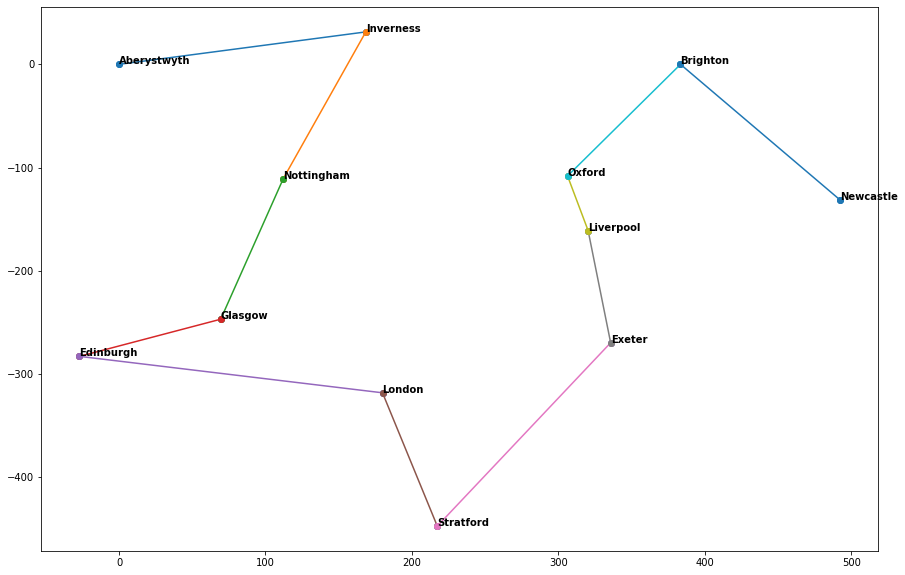

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.scatter(x, y)

for i, txt in enumerate(cities_lst):
    ax.annotate(txt, (x[i], y[i]), weight='bold')
plot_tour(t1)